# Cat VS Dog

The purpose of this model is to develop a  Convolutional Neural Network for recognizing dog vs cat

In [2]:
import tensorflow as tf
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau


import sys
sys.path.insert(1, "/home/azureuser/DataAnalyzer/src")

"""
Benchmark:
Bug : pour fixer le bug modifier le chemin /home/azureuser/DataAnalyzer/src/modules par /home/azureuser/DataAnalyzer/src : executer
 ensuite réexecuter avec /home/azureuser/DataAnalyzer/src/modules

"""
from src.data.data_validator import *
from src.data.data_processing import *

from PIL import Image as PImage
import numpy as np
import string

from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
import seaborn as sns

2022-06-05 17:26:23.442994: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-05 17:26:23.443027: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## The data preparation


In [3]:
sns.set(rc = {'figure.figsize':(15,15)})

### Data Validation

Validate the dataset using the data_validator method

In [4]:

training_dir = '/home/azureuser/catvsdog_dataset/training'
testing_dir = '/home/azureuser/catvsdog_dataset/testing'
validation_dir = '/home/azureuser/catvsdog_dataset/validation'

for i in ["cat","dog"]:
    data_validator(training_dir   + "/" + i)
    data_validator(testing_dir    + "/" + i)
    data_validator(validation_dir + "/" + i)

/home/azureuser/.local/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


### Generate directory to read images from & Data augmentation

In [5]:

train_datagen = image.ImageDataGenerator(rescale=1.0/255.) #normalisation
train_generator = train_datagen.flow_from_directory(training_dir,batch_size=250,class_mode='binary',target_size=(150, 150), shuffle=True)

test_datagen = image.ImageDataGenerator(rescale=1.0/255.)
test_generator = test_datagen.flow_from_directory(testing_dir,class_mode='binary',target_size=(150, 150), shuffle=False)


validation_datagen = image.ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(validation_dir,class_mode='binary',target_size=(150, 150), shuffle=True)

Found 20000 images belonging to 2 classes.
Found 3999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
dict_directory = {v: k for k, v in train_generator.class_indices.items()}
print(dict_directory)

{0: 'cat', 1: 'dog'}


## Data Visualisation

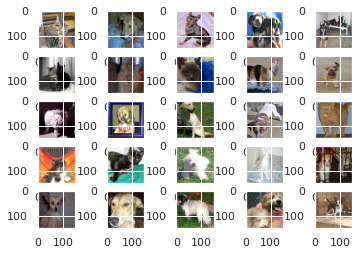

In [7]:
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(train_generator[i][0][0], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

import the dataset

In [8]:
catvsdog_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-06-05 17:27:17.819424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-05 17:27:17.819460: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-05 17:27:17.819486: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Data-Ana): /proc/driver/nvidia/version does not exist
2022-06-05 17:27:17.820349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
catvsdog_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

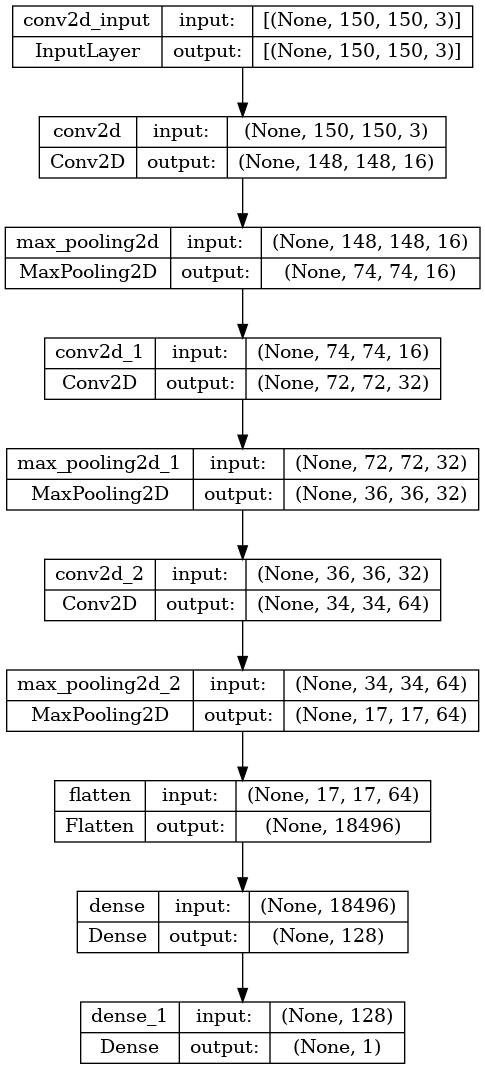

In [10]:
plot_model(catvsdog_model, to_file='/home/azureuser/catvsdog_dataset/benchmark/model_plot_letter_1.png', show_shapes=True, show_layer_names=True)

Build the model with optimizer and loss function

In [11]:
catvsdog_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

Training the model : To find the relation between data and labels

# Fit Model

In [12]:
history = catvsdog_model.fit(train_generator, epochs=150, validation_data=validation_generator, validation_steps=6)

Epoch 1/150


2022-06-05 17:27:20.156852: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67500000 exceeds 10% of free system memory.
2022-06-05 17:27:22.834560: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67500000 exceeds 10% of free system memory.
2022-06-05 17:27:22.881783: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 350464000 exceeds 10% of free system memory.
2022-06-05 17:27:24.048644: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 67500000 exceeds 10% of free system memory.
2022-06-05 17:27:24.395663: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 87616000 exceeds 10% of free system memory.


10/80 [==>...........................] - ETA: 9:09 - loss: 0.7516 - acc: 0.5108

KeyboardInterrupt: 

## plot  curves

In [ ]:

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
pyplot.title('Accuracy Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuray')
pyplot.plot(history.history['accuracy'], label='Accuracy')
pyplot.plot(history.history['val_accuracy'], label='Val_Accuracy')
pyplot.legend()
pyplot.show()

## Model Evaluation

In [ ]:
##TODO

test_generator.reset()
# Evaluate on Validation data
scores = catvsdog_model.evaluate(test_generator)
print("%s%s: %.2f%%" % ("evaluate ",catvsdog_model.metrics_names[1], scores[1]*100))

In [ ]:
predict_model("/home/azureuser/digit_data/testing/cat/10500.jpg",catvsdog_model)

In [ ]:
predict_model("/home/azureuser/digit_data/testing/dog/10500.jpg",catvsdog_model)

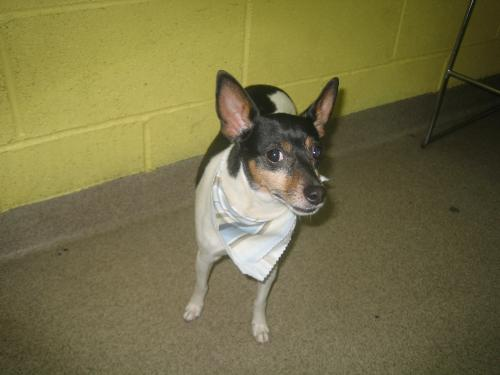

[1.]
 is a dog


In [ ]:


def loadImage(path):
    return PImage.open(path +"/" +"10002.jpg")

path =  "/home/azureuser/data/testing/dog"

# your images in an array
img = loadImage(path)
img.show()
rimg=img.resize((150,150))
x = np.asarray(rimg)
x = np.expand_dims(x, axis=0)
image = np.vstack([x])
classes = catvsdog_model.predict(image)
print(classes[0])
if classes[0]>0.5:
    print(" is a dog")
else:
    print(" is a cat")